# CIFAR10 From Scratch CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [2]:

# Load and preprocess CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Normalize using CIFAR-10 mean and std
mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 [==============================] - 341s 2us/step


In [13]:

# Model using Sequential
model = models.Sequential([
    layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(10, activation='softmax')
])


In [8]:
# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
lr_schedule = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train
history = model.fit(x_train, y_train, epochs=30, batch_size=64,
          validation_data=(x_test, y_test),
          callbacks=[early_stop, lr_schedule])


Epoch 1/30
782/782 [==============================] - 371s 472ms/step - loss: 1.8973 - accuracy: 0.3359 - val_loss: 1.2943 - val_accuracy: 0.5333 - lr: 0.0010
Epoch 2/30
782/782 [==============================] - 393s 503ms/step - loss: 1.4254 - accuracy: 0.4771 - val_loss: 1.0718 - val_accuracy: 0.6235 - lr: 0.0010
Epoch 3/30
782/782 [==============================] - 273s 349ms/step - loss: 1.2434 - accuracy: 0.5493 - val_loss: 1.0665 - val_accuracy: 0.6485 - lr: 0.0010
Epoch 4/30
782/782 [==============================] - 247s 316ms/step - loss: 1.1208 - accuracy: 0.5975 - val_loss: 0.9001 - val_accuracy: 0.6929 - lr: 0.0010
Epoch 5/30
782/782 [==============================] - 242s 310ms/step - loss: 1.0069 - accuracy: 0.6443 - val_loss: 0.8394 - val_accuracy: 0.7159 - lr: 0.0010
Epoch 6/30
782/782 [==============================] - 245s 313ms/step - loss: 0.9083 - accuracy: 0.6816 - val_loss: 0.7648 - val_accuracy: 0.7410 - lr: 0.0010
Epoch 7/30
782/782 [==========================

In [10]:
# Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")


Final Test Accuracy: 0.8024


In [11]:
import matplotlib.pyplot as plt
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

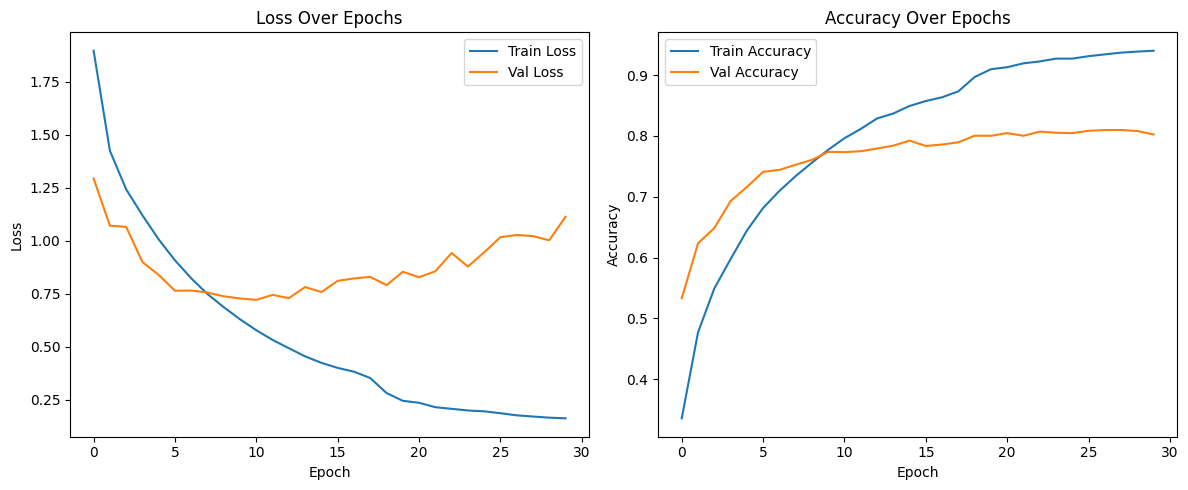

In [12]:
plot_training_history(history)